# Loss Function and Gradient Descent

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()

## Warm-Up!


In [3]:
print(diabetes.data[:10])
print(diabetes.target[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581619  0.00306441]


In [4]:
print("Feature names and their data types:")
for feature_name, dtype in zip(diabetes.feature_names, diabetes.data[0]):
    print(f"{feature_name}: {type(dtype).__name__}")

Feature names and their data types:
age: float64
sex: float64
bmi: float64
bp: float64
s1: float64
s2: float64
s3: float64
s4: float64
s5: float64
s6: float64


In [5]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
missing_values = df.isnull().sum()

print("Missing values per feature:")
print(missing_values)

if missing_values.sum() > 0:
    df.fillna(df.mean(), inplace=True)

    print("\nMissing values after handling:")
    print(df.isnull().sum())
else:
    print("\nNo missing values found.")

Missing values per feature:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

No missing values found.


In [6]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

diabetes.data = df_scaled

print("Min-Max scaled data:")
print(df_scaled[:5])

Min-Max scaled data:
[[0.66666667 1.         0.58264463 0.54929577 0.29411765 0.25697211
  0.20779221 0.28208745 0.562217   0.43939394]
 [0.48333333 0.         0.14876033 0.35211268 0.42156863 0.30677291
  0.62337662 0.14104372 0.22243673 0.16666667]
 [0.88333333 1.         0.51652893 0.43661972 0.28921569 0.25896414
  0.24675325 0.28208745 0.49657763 0.40909091]
 [0.08333333 0.         0.30165289 0.30985915 0.49509804 0.44721116
  0.23376623 0.42313117 0.57292288 0.46969697]
 [0.51666667 0.         0.20661157 0.54929577 0.46568627 0.41733068
  0.38961039 0.28208745 0.36238548 0.33333333]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.05, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (419, 10) (419,)
Testing set shape: (23, 10) (23,)


## Main Task

### Part 1: Fuctions' Implementation

#### MSE

In [8]:
def mean_squared_error(y_true, y_pred):
    return np.average((y_true - y_pred) ** 2)

#### MAE

In [9]:
def mean_absolute_error(y_true, y_pred):
    return np.average(np.abs(y_pred - y_true), axis=0)

#### RMSE

In [10]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(
        mean_squared_error(
            y_true, y_pred
        )
    )

#### $R^2$ Score

In [11]:
def r2_score(y_true, y_pred):    
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    

### Part 2: Building and Training the Linear Regression Model

In [92]:
def cost_function(X, y, weights):
    n = len(y)
    predictions = X.dot(weights)
    cost = (1/2*n) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    n = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        updates = (learning_rate/n) * X.T.dot(errors)
        weights -= updates
        if i % 100 == 0 or i == (iterations - 1):
            print(f"Cost in iteration {i}:", cost_function(X, y, weights))
        # cost_history[i] = cost_function(X, y, weights)
    return weights, cost_history

def predict(X, weights):
    X = np.insert(X.T, 0, 1, axis=0)
    predictions = X.T.dot(weights)
    return predictions


def score(y_pred, y_true):
    assert y_true.shape[0] == y_pred.shape[0], "Number of samples in y_true and self.y_pred must be equal."
    return {
        "MSE": f"{mean_squared_error(y_true, y_pred):.3f}",
        "MAE": f"{mean_absolute_error(y_true, y_pred):.3f}",
        "RMSE": f"{mean_squared_error(y_true, y_pred):.3f}",
        "R2": f"{r2_score(y_true, y_pred):.3f}",
    }

In [95]:
X, y = X_train, y_train

X = np.c_[np.ones(X.shape[0]), X] ## add column for bias

weights = np.random.rand(X.shape[1]) ## make random weights

iterations = 1000
learning_rate = 0.1

weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

print(f"Final weights after training: {weights}")

Cost in iteration 0: 1421462557.495571
Cost in iteration 100: 307369470.77564967
Cost in iteration 200: 275028031.8434571
Cost in iteration 300: 262405549.1451869
Cost in iteration 400: 256749038.5544812
Cost in iteration 500: 253955818.1812893
Cost in iteration 600: 252480617.22542298
Cost in iteration 700: 251661439.7485021
Cost in iteration 800: 251186805.35729685
Cost in iteration 900: 250900679.76913124
Cost in iteration 999: 250722845.68440342
Final weights after training: [ 42.25269362   3.34334479 -24.69641453 135.05977379  83.35649691
 -29.76584986 -28.04758564 -53.35872159  42.0853018  105.28878074
  26.32035433]


### Part 3: Model Evaluation

In [96]:
y_pred = predict(X_test, weights)

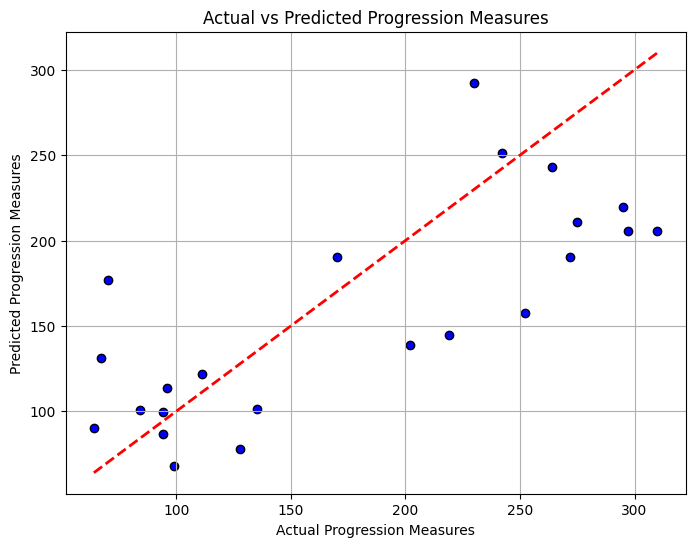

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.title('Actual vs Predicted Progression Measures')
plt.grid(True)
plt.show()

In [98]:
y_pred = predict(X_train, weights)
score(y_pred, y_train)

{'MSE': '2856.248', 'MAE': '43.156', 'RMSE': '2856.248', 'R2': '0.509'}

In [99]:
y_pred = predict(X_test, weights)
score(y_pred, y_test)

{'MSE': '3507.749', 'MAE': '49.237', 'RMSE': '3507.749', 'R2': '0.518'}

### Part 4: Ordinary Least Squares

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              371.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                   2.86e-198
Time:                        22:02:30   Log-Likelihood:                         -2259.7
No. Observations:                 419   AIC:                                      4539.
Df Residuals:                     409   BIC:                                      4580.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

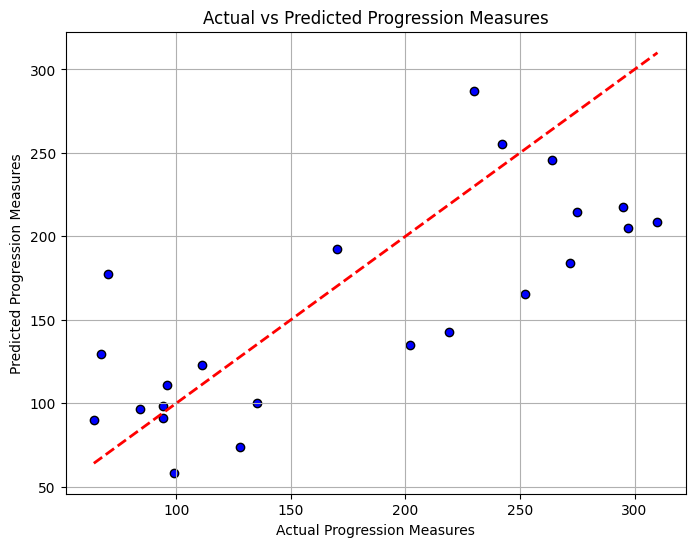

In [100]:
import statsmodels.api as sm

X = diabetes.data
y = diabetes.target

X = sm.add_constant(X)


model = sm.OLS(y_train, X_train).fit()

print(model.summary())

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.title('Actual vs Predicted Progression Measures')
plt.grid(True)
plt.show()
